# kaggle房價資料進行EDA

## Step1.引入所需模組

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# fix 中文亂碼 
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False#正負號 

## Step2.讀入資料集train.csv

In [20]:
#不連網時，可上網下載檔案並另存為.csv檔，並存在同資料夾中
df =  pd.read_csv('./data/train.csv')#當前資料夾下(./)
df.head(10)#查看前10筆

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Step3.使用info()觀察欄位資訊

In [21]:
# 觀察資料集彙總資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# 是否有含遺失值(Missing value)
pd.options.display.max_rows = None
df.isnull().sum()
#結果顯示多個變數都有missing值

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [23]:
#欄位Id為無用欄位
df=df.drop('Id',axis=1)

In [24]:
# 確認是否有刪除不要之欄位並確認是否有含遺失值(Missing value)
pd.options.display.max_rows = None
df.isnull().sum()
#結果顯示多個變數都有missing值

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## Step4.使用describe()跑檔案基本描述統計值

### 數值型欄位

In [25]:
#跑數值型的描述性統計資料，使用describe()
#跑出加總筆數、平均數、標準差、最小值、最大值、第25百分位數、第50百分位數、第75百分位數、最大值
#類別行資料不會跑
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 類別型欄位

In [26]:
# object(非數值型欄位) 欄位統計
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### 數值型欄位可使用LotArea(土地面積)、YearBuilt(建造日期)、arageArea
### 類別型欄位可使用Street、Neighborhood、KitchenQual

### 觀察含missing的變數

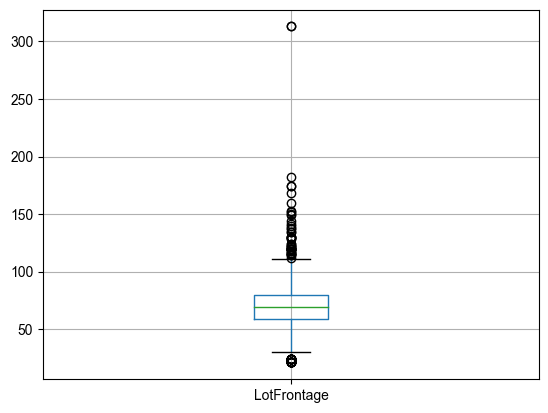

In [27]:
#數值型變數LotFrontage有missing=259
#單一欄位繪製箱型圖
df.boxplot(column=['LotFrontage'])
plt.show()
#有多筆離群值，使用中位數取代

In [28]:
#計算欄位LotFrontage的平均數並存為medianLotFrontage欄位
medianLotFrontage = df['LotFrontage'].median()

In [29]:
#將LotFrontage中NaN資料取代為計算好的medianLotFrontage欄位
df['LotFrontage'].replace(np.nan, medianLotFrontage, inplace=True)

In [30]:
#類別型變數MasVnrType有missing=872
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [31]:
#類別變數使用眾數取代
modeMasVnrType = df['MasVnrType'].mode()
modeMasVnrType

0    BrkFace
Name: MasVnrType, dtype: object

In [32]:
#將MasVnrType中NaN資料取代為眾數'BrkFace'
df['MasVnrType'].replace(np.nan, str('BrkFace'), inplace=True)

In [33]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

In [34]:
#將指定欄位中NA資料取代為'No'
#使用pandas模組中fillna()將指定欄位NA資料取代為'No'
#因由欄位說明中確認為回答'No'的次數，並非missing，不能刪除
df.fillna({'GarageQual':'No Garage','Alley':'No alley access','GarageCond':'No Garage','GarageType':'No Garage','PoolQC':'No Pool','MiscFeature':'None','GarageFinish':'No Garage','FireplaceQu':'No Fireplace','BsmtFinType2':'No Basement','BsmtQual':'No Basement','Fence':'No Fence','BsmtCond':'No Basement','BsmtFinType1':'No Basement','BsmtExposure':'No Basement'}, inplace=True)


In [35]:
#將BGarageYrBlt中NA資料取代為0
df['GarageYrBlt'].replace(np.nan, 0, inplace=True)

### 再次確認missing資訊

In [36]:
# 是否有含遺失值(Missing value)
pd.options.display.max_rows = None
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Step5.刪除missing

In [37]:
df=df.dropna()

In [38]:
# 是否有含遺失值(Missing value)
pd.options.display.max_rows = None
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Step6.看SalePrice的分佈

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


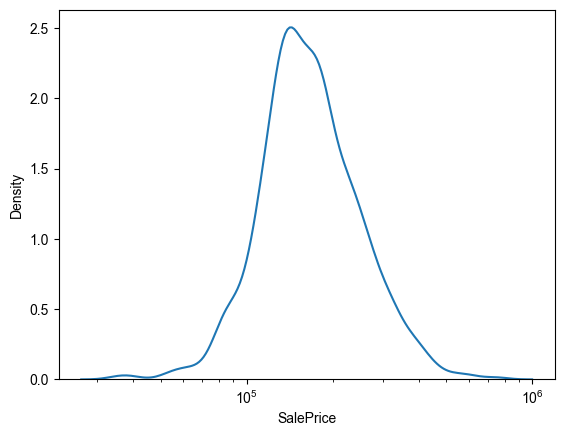

In [39]:
print(df['SalePrice'].describe())
sns.kdeplot(df['SalePrice'], log_scale=True)
plt.show()

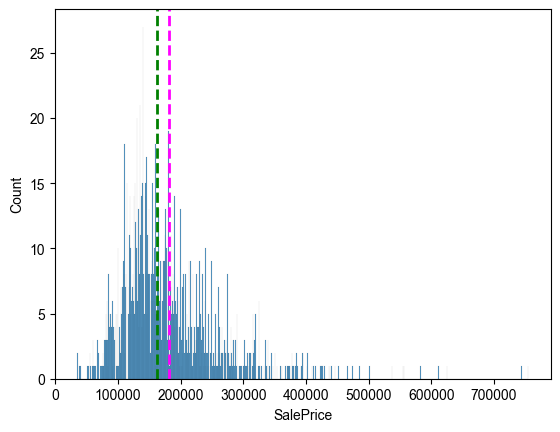

In [40]:
#使用seaborn模組histplot()跑直方圖
#建議使用seaborn模組繪圖會較精美
SalePrice = df['SalePrice']
sns.histplot(df['SalePrice'], bins=800)
plt.axvline(SalePrice.mean(), color='magenta', linestyle='dashed', linewidth=2)
#紫色虛線標示出'height(cm)'平均值
plt.axvline(SalePrice.median(), color='green', linestyle='dashed', linewidth=2)
#綠色虛線標示出'height(cm)'中位數
plt.show()

In [41]:
# 計算偏態(Skewness)
SalePrice.skew()

1.8831110462405252

## 中位數 < 平均數，表示欄位'SalePrice'資料呈現右偏

## Step7.變數分析

#### 數值型欄位可使用LotArea(土地面積)、YearBuilt(建造年度)、arageArea
#### 類別型欄位可使用Street、Neighborhood、KitchenQual

### 單變數分析

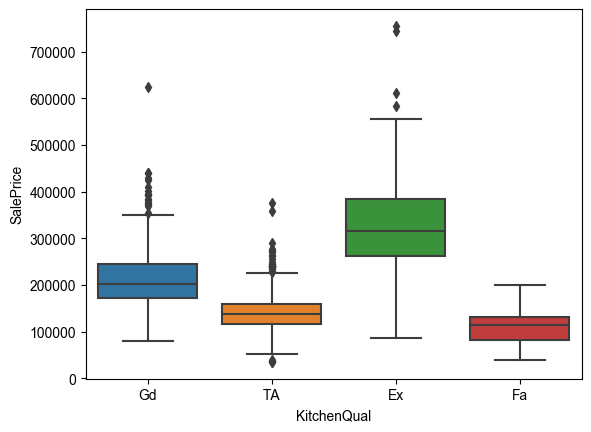

In [42]:
sns.boxplot(x='KitchenQual',y='SalePrice',data=df)
plt.show()

### 由箱形圖可看出廚房品質分類間的銷售金額會有不同，而且資料離散程度也都明顯不同

In [47]:
df_Grvl = df[df['Street'] == 'Grvl']
df_Pave = df[df['Street'] == 'Pave']

In [51]:
## Using figure function to define the data argument and setting it to the bars for India and China 
fig = go.Figure(data = [go.Bar(x = df_Grvl['YearBuilt'], y = df_Grvl['SalePrice'], marker_color = 'indianred',name = 'Grvl'),
                go.Bar(x = df_Pave['YearBuilt'], y = df_Pave['SalePrice'], marker_color = 'blue',name = 'Pave')
                ])

## Setting the titles, xaxis and yaxis  
fig.update_layout(title='建造年度與街道類型之房屋銷售金額',
                   xaxis_title='YearBuilt',
                   yaxis_title='SalePrice',
                   )

fig.show();
#圖型失敗

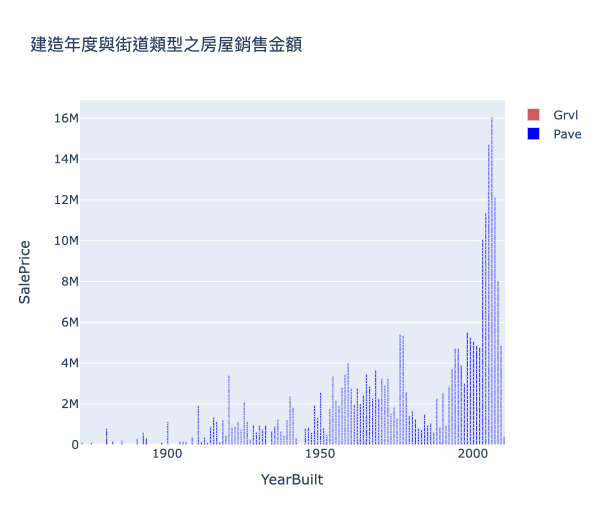

In [52]:
from IPython.display import Image
Image('newplot.png', width=600)

### 由圖型看出通往房屋之街道類型是Pave(柏油)的數量隨年度增加銷售金額呈現遞增;通往房屋之街道類型是Grvl(碎石路)的數量隨年度增加銷售金額呈現遞減且資料筆數較Pave的少

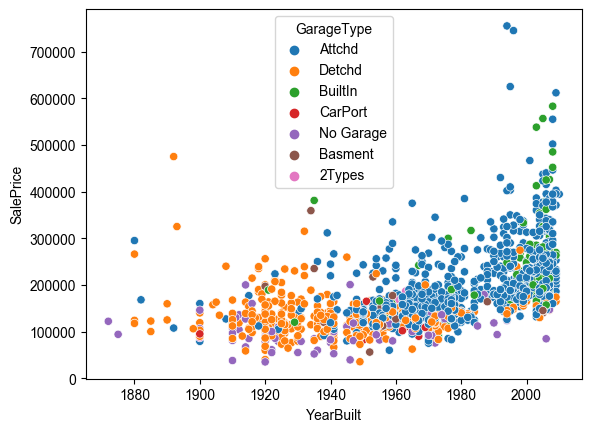

In [50]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], hue=df['GarageType'])
plt.show()

### 由圖可看出車庫位置與建造年度有關與房屋銷售金額無相關性